In [ ]:
import numpy as np
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('universal_tagset')
nltk.download('wordnet')
lemmatizer = nltk.WordNetLemmatizer()

from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag



from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.svm import SVC
from itertools import *
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

from nltk.corpus import wordnet

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.sparse import csr_matrix
import numpy as np
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, make_scorer

from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.under_sampling import ClusterCentroids
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import NearMiss, RandomUnderSampler

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K
from keras.models import Sequential
from keras.layers.recurrent import LSTM, SimpleRNN, GRU

import logging
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/amazon_baby.csv')
## print shape of dataset with rows and columns and information
print ("The shape of the  data is (row, column):"+ str(df.shape))
print (df.info())

The shape of the  data is (row, column):(183531, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183531 entries, 0 to 183530
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   name    183213 non-null  object
 1   review  182702 non-null  object
 2   rating  183531 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.2+ MB
None


In [ ]:
df.isnull().sum()

name      318
review    829
rating      0
dtype: int64

In [ ]:
df= df[df['name'].notnull()]
df= df[df['review'].notnull()]

In [ ]:
df.isnull().sum()

name      0
review    0
rating    0
dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def sentiment(x):
    if x>3:
        return 1

    elif x==3:
        return 0
    else:
        return -1


df['sentiment'] = df['rating'].apply(lambda x: sentiment(x) )

In [ ]:
x= df['review']
y= df['sentiment']

In [ ]:
tokens = x[0].split()
print(tokens)

['These', 'flannel', 'wipes', 'are', 'OK,', 'but', 'in', 'my', 'opinion', 'not', 'worth', 'keeping.', 'I', 'also', 'ordered', 'someImse', 'Vimse', 'Cloth', 'Wipes-Ocean', 'Blue-12', 'countwhich', 'are', 'larger,', 'had', 'a', 'nicer,', 'softer', 'texture', 'and', 'just', 'seemed', 'higher', 'quality.', 'I', 'use', 'cloth', 'wipes', 'for', 'hands', 'and', 'faces', 'and', 'have', 'been', 'usingThirsties', '6', 'Pack', 'Fab', 'Wipes,', 'Boyfor', 'about', '8', 'months', 'now', 'and', 'need', 'to', 'replace', 'them', 'because', 'they', 'are', 'starting', 'to', 'get', 'rough', 'and', 'have', 'had', 'stink', 'issues', 'for', 'a', 'while', 'that', 'stripping', 'no', 'longer', 'handles.']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# next we need to vectorize our input variable (X)
#we use the count vectoriser function and the analyser we use is the above lines of code
# this should return a vector array
bow_transformer = CountVectorizer().fit(x)

In [ ]:
len(bow_transformer.vocabulary_)

67943

In [ ]:
X = bow_transformer.transform(x)

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({1: 139318, -1: 26361, 0: 16705})
Resampled dataset shape Counter({0: 139318, 1: 139318, -1: 139318})


In [ ]:
#Lets start training the model
from sklearn.model_selection import train_test_split
#using 30% of the data for testing, this will be revised once we do not get the desired accuracy
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=101)

In [ ]:
stop = set(stopwords.words('english'))

In [ ]:
def clean_document(doco):
    punctuation = string.punctuation
    punc_replace = ''.join([' ' for s in punctuation])
    doco_link_clean = re.sub(r'http\S+', '', doco)
    doco_clean_and = re.sub(r'&\S+', '', doco_link_clean)
    doco_clean_at = re.sub(r'@\S+', '', doco_clean_and)
    doco_clean = doco_clean_at.replace('-', ' ')
    doco_alphas = re.sub(r'\W +', ' ', doco_clean)
    trans_table = str.maketrans(punctuation, punc_replace)
    doco_clean = ' '.join([word.translate(trans_table) for word in doco_alphas.split(' ')])
    doco_clean = doco_clean.split(' ')
    p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
    doco_clean = [word.lower() for word in doco_clean if len(word) > 2]
    doco_clean = ([i for i in doco_clean if i not in stop])
#     doco_clean = [spell(word) for word in doco_clean]
#     p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
#     doco_clean = ([spell(k) for k in doco_clean])
    return doco_clean

In [ ]:
# Generate a cleaned reviews array from original review texts
review= df['review']
review_cleans = [clean_document(doc) for doc in review];
sentences = [' '.join(r) for r in review_cleans ]

In [ ]:
print(sentences[7])

perfect new parents able keep track baby feeding sleep diaper change schedule first two half months life made life easier doctor would ask questions habits right


In [ ]:
print(review[7])

Perfect for new parents. We were able to keep track of baby's feeding, sleep and diaper change schedule for the first two and a half months of her life. Made life easier when the doctor would ask questions about habits because we had it all right there!


In [ ]:
#Keras
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

In [ ]:
text_sequences = np.array(tokenizer.texts_to_sequences(sentences))
sequence_dict = tokenizer.word_index
word_dict = dict((num, val) for (val, num) in sequence_dict.items())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
print(text_sequences)

[list([2343, 325, 944, 118, 544, 15, 177, 32872, 6392, 260, 325, 2210, 458, 32873, 412, 1517, 949, 1514, 438, 826, 61, 5, 260, 325, 220, 2535, 32874, 241, 6198, 325, 32875, 25, 64, 576, 851, 11, 1128, 2808, 380, 7441, 247, 585])
 list([153, 929, 315, 7, 3197, 1869, 249, 617, 532, 32876, 4952, 325, 3810, 316, 156, 33])
 list([67, 106, 672, 114, 39, 334, 56, 152, 198, 4, 33, 287, 115, 583, 2650])
 ... list([134, 114, 3, 659, 107, 102, 400, 3, 61])
 list([464, 96, 16, 1521, 16, 6, 84, 17, 122, 74, 2, 6058, 958, 340, 65126, 109, 279, 349, 19785, 32871, 1176, 217, 15, 1092, 7996, 245, 434, 901, 1201, 1033, 3703, 4118, 3829, 291, 3441, 2120, 3487, 1238, 56, 1, 2, 17, 4776, 2928, 392, 6058, 1857, 217, 69, 180, 10, 662, 422, 15, 2260, 1176, 3250, 122, 15, 23, 1, 189, 217, 596, 192, 4, 2285, 33, 19785, 32871, 1, 189, 1176, 217, 490, 6, 115, 10, 49, 57, 1, 5215, 189, 209])
 list([7, 16, 7476, 19, 109, 30, 2261, 1607, 95, 2065, 3220, 620, 6288, 14, 50, 13, 15, 267, 853, 30])]


In [ ]:
print(sequence_dict)

{'baby': 1, 'one': 2, 'great': 3, 'would': 4, 'use': 5, 'like': 6, 'love': 7, 'seat': 8, 'little': 9, 'easy': 10, 'get': 11, 'old': 12, 'well': 13, 'really': 14, 'also': 15, 'product': 16, 'time': 17, 'son': 18, 'bought': 19, 'good': 20, 'much': 21, 'daughter': 22, 'put': 23, 'stroller': 24, 'months': 25, 'back': 26, 'even': 27, 'first': 28, 'used': 29, 'car': 30, 'still': 31, 'loves': 32, 'recommend': 33, 'bag': 34, 'two': 35, 'got': 36, 'nice': 37, 'could': 38, 'fit': 39, 'using': 40, 'around': 41, 'buy': 42, 'enough': 43, 'perfect': 44, 'month': 45, 'child': 46, 'price': 47, 'made': 48, 'way': 49, 'work': 50, 'since': 51, 'small': 52, 'keep': 53, 'better': 54, 'diaper': 55, 'size': 56, 'make': 57, 'think': 58, 'room': 59, 'year': 60, 'quality': 61, 'works': 62, 'take': 63, 'need': 64, 'big': 65, 'thing': 66, 'soft': 67, 'crib': 68, 'easily': 69, 'new': 70, 'cute': 71, 'bottles': 72, 'clean': 73, 'right': 74, 'without': 75, 'side': 76, 'purchased': 77, 'every': 78, 'set': 79, 'bottle

In [ ]:
reviews_encoded = [];
for i,review in enumerate(review_cleans):
    reviews_encoded.append([sequence_dict[x] for x in review]);

(array([  22.,  206.,  270.,  212.,  244.,  298.,  480., 1105., 2425.,
        4036., 5922., 7011., 7310., 6972., 6649., 5916., 5504., 4813.,
        4706., 4390., 4170., 3903., 3847., 7008.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 24 Patch objects>)

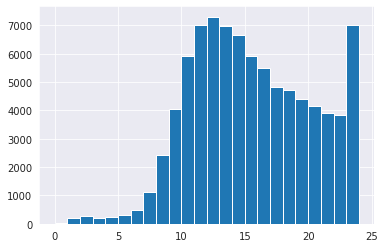

In [ ]:
lengths = [len(x) for x in reviews_encoded]
plt.hist(lengths, bins=range(25))

In [ ]:
print(reviews_encoded[135])

[19, 18, 25, 12, 32, 9, 768, 27, 25, 253, 1103, 353, 1624, 913, 101, 63, 18, 1324, 298, 11033, 14, 5, 913]


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_cap =8;
X = pad_sequences(reviews_encoded, maxlen=max_cap, truncating='post')

In [ ]:
Y = df['sentiment']

In [ ]:
train_cap = int(0.85 * len(X));
dev_cap = int(0.93 * len(X));

In [ ]:
X_train, Y_train = X[:train_cap], y[:train_cap]
X_dev, Y_dev = X[train_cap:dev_cap], y[train_cap:dev_cap]
X_test1, Y_test1 = X[dev_cap:], y[dev_cap:]

In [ ]:
X.shape

(182384, 8)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import eval
from keras.layers import Dropout
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.layers import Dense, Activation, Flatten


model1 = Sequential();
model1.add(Embedding(len(word_dict)+1, max_cap, input_length=X.shape[1]));
#adding a LSTM layer of dim 1--
model1.add(LSTM(100, return_sequences=True));
#model1.add(LSTM(100, return_sequences=True));
#adding a dense layer with activation function of relu
model1.add(Dense(50, activation='relu'));#best 50,relu
model1.add(Flatten())
#model1.add(Dropout(0.5))
#adding the final output activation with activation function of softmax
model1.add(Dense(1, activation='softmax'));
print(model1.summary());
optimizer = Adam(learning_rate=0.0001, decay=0.0001);

model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# fit model and run it for 5 epochs
history=model1.fit(X_train, Y_train, batch_size=256, epochs=100, validation_data=(X_test1, Y_test1))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 8, 8)              521016    
                                                                 
 lstm_9 (LSTM)               (None, 8, 100)            43600     
                                                                 
 dense_18 (Dense)            (None, 8, 50)             5050      
                                                                 
 flatten_9 (Flatten)         (None, 400)               0         
                                                                 
 dense_19 (Dense)            (None, 1)                 401       
                                                                 
Total params: 570,067
Trainable params: 570,067
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
606/606 [=====================

In [ ]:
score = model1.evaluate(X_test1, Y_test1)
print("Test accuracy: %0.4f%%" % (score[1]*100))

399/399 [==============================] - 1s 3ms/step - loss: 269.3259 - accuracy: 0.7801
Test accuracy: 78.0058%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


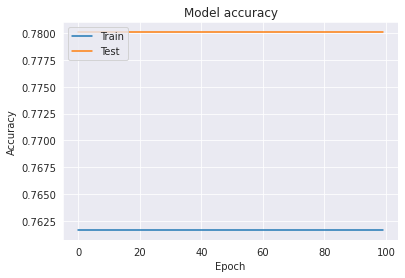

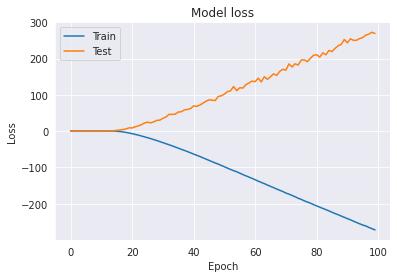

In [ ]:
import matplotlib as pyplot
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# predict probabilities for test set
yhat_probs = model1.predict(X_test1, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

In [ ]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test1, yhat_probs.round())
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_test1, yhat_probs.round(),average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test1, yhat_probs.round(),average='micro')
print('Recall: %f' % recall)

Accuracy: 0.780058
Precision: 0.780058
Recall: 0.780058


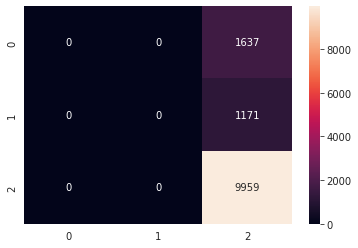

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=Y_test1, y_pred=yhat_probs)
import seaborn as sns
sns.heatmap(cm, annot=True,fmt= '.6g')


In [ ]:
print(cm)

[[   0    0 1637]
 [   0    0 1171]
 [   0    0 9959]]


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


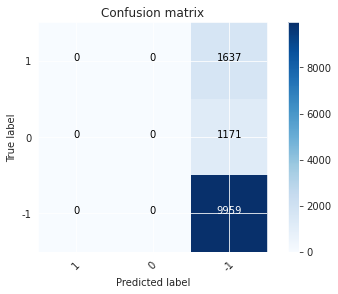

In [ ]:
cm = metrics.confusion_matrix(Y_test1, yhat_probs)
plot_confusion_matrix(cm, classes=['1','0','-1'])